In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import matplotlib as mpl 
import os

import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "module4"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
data=pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\VENKEYS.csv")
df=pd.DataFrame(data)

In [3]:
df['14 Day MA'] = df['Close Price'].rolling(window=14).mean()
df['30 Day STD'] = df['Close Price'].rolling(window=20).std()
df['Upper Band'] = df['14 Day MA'] + (df['30 Day STD'] * 2)
df['Lower Band'] = df['14 Day MA'] - (df['30 Day STD'] * 2)
df = df.dropna()
df['Mid Band'] = (df['Upper Band']+df['Lower Band'])/2
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,VENKEYS,EQ,09-Jun-2017,1427.25,1435.00,1460.0,1406.35,1410.70,1414.45,1430.34,146657,2.097699e+08,8140,31001,21.14,1261.635714,84.027346,1429.690405,1093.581023,1261.635714
20,VENKEYS,EQ,12-Jun-2017,1414.45,1410.70,1439.0,1371.20,1396.00,1392.70,1400.10,103625,1.450854e+08,9181,35590,34.34,1276.271429,89.286822,1454.845073,1097.697784,1276.271429
21,VENKEYS,EQ,13-Jun-2017,1392.70,1407.00,1442.4,1380.10,1387.80,1387.95,1409.59,94132,1.326873e+08,7544,36500,38.78,1293.632143,92.853836,1479.339815,1107.924470,1293.632143
22,VENKEYS,EQ,14-Jun-2017,1387.95,1396.65,1414.0,1370.00,1391.00,1385.90,1391.60,65922,9.173733e+07,3672,28127,42.67,1308.207143,95.454897,1499.116937,1117.297349,1308.207143
23,VENKEYS,EQ,15-Jun-2017,1385.90,1390.00,1503.0,1373.00,1462.05,1459.65,1462.22,353118,5.163379e+08,21732,76423,21.64,1323.832143,100.705832,1525.243807,1122.420479,1323.832143


In [29]:
def select_buy(venkey_dat):
    if venkey_dat['Close Price'] < venkey_dat['Lower Band']:
        return "Buy"
    if venkey_dat['Close Price'] > venkey_dat['Lower Band'] and venkey_dat['Close Price'] < venkey_dat['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if venkey_dat['Close Price'] > venkey_dat['Mid Band'] and venkey_dat['Close Price'] < venkey_dat['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if venkey_dat['Close Price'] > venkey_dat['Upper Band']:
        return "Short"
df = df.assign(Call = df.apply(select_buy, axis=1))
df.head()
df=df.drop(["Symbol","Series","Date"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 19 to 493
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Prev Close              475 non-null    float64
 1   Open Price              475 non-null    float64
 2   High Price              475 non-null    float64
 3   Low Price               475 non-null    float64
 4   Last Price              475 non-null    float64
 5   Close Price             475 non-null    float64
 6   Average Price           475 non-null    float64
 7   Total Traded Quantity   475 non-null    int64  
 8   Turnover                475 non-null    float64
 9   No. of Trades           475 non-null    int64  
 10  Deliverable Qty         475 non-null    int64  
 11  % Dly Qt to Traded Qty  475 non-null    float64
 12  14 Day MA               475 non-null    float64
 13  30 Day STD              475 non-null    float64
 14  Upper Band              475 non-null    f

In [30]:
x=df.drop("Call",axis=1)
y=df["Call"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
log_clf = LogisticRegression(C=89,random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=800, random_state=0,max_features=6)
svm_clf = SVC(gamma="auto", random_state=0)
knn_clf=KNeighborsClassifier(metric="euclidean",n_neighbors=9)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [62]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=89, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                 

In [63]:
for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred),"\n",confusion_matrix(y_test,ypred))
    

LogisticRegression 0.40559440559440557 
 [[ 0  4  0  0]
 [ 0 68  6  1]
 [ 0 16 42  0]
 [ 0  1  2  3]]
RandomForestClassifier 0.7902097902097902 
 [[ 0  4  0  0]
 [ 0 68  6  1]
 [ 0 16 42  0]
 [ 0  1  2  3]]
KNeighborsClassifier 0.5664335664335665 
 [[ 0  4  0  0]
 [ 0 68  6  1]
 [ 0 16 42  0]
 [ 0  1  2  3]]
VotingClassifier 0.6783216783216783 
 [[ 0  4  0  0]
 [ 0 68  6  1]
 [ 0 16 42  0]
 [ 0  1  2  3]]


In [54]:
data1 = pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\VIPIND.csv")
df1=pd.DataFrame(data1)
df1.head()
df1=df1.drop(["Symbol","Series"],axis=1)
df1.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,15-May-2017,202.05,203.65,205.00,198.10,198.95,199.20,200.70,145003,2.910230e+07,2102,66456,45.83
1,16-May-2017,199.20,200.40,205.00,198.90,201.00,200.90,202.30,357349,7.229150e+07,6281,101836,28.50
2,17-May-2017,200.90,201.55,202.05,198.50,199.00,199.65,200.71,128429,2.577757e+07,3750,64230,50.01
3,18-May-2017,199.65,199.10,202.00,192.05,192.55,193.30,198.79,441208,8.770869e+07,6837,240717,54.56
4,19-May-2017,193.30,199.00,204.00,194.25,196.50,195.95,198.82,723731,1.438891e+08,10066,184810,25.54


In [55]:
df1['%chg op_cl'] = ((df1['Close Price'] - df1['Open Price'])/(df1['Close Price']))*100
df1['%chg lw_hg'] = ((df1['Close Price'] - df1['High Price'])/(df1['Low Price']))*100
df1['%chg 5dymean'] = df1['Close Price'].pct_change().dropna().rolling(5).mean()
df1['%chg 5dystd'] = df1['Close Price'].pct_change().dropna().rolling(5).std()
df1 = df1.dropna()
df1.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,22-May-2017,195.95,199.0,200.50,190.25,192.6,192.85,195.55,282636,55269091.75,3895,121074,42.84,-3.189007,-4.021025,-0.006321,0.018450
6,23-May-2017,192.85,193.9,194.25,181.00,182.5,183.20,186.01,186052,34606724.45,3689,80316,43.17,-5.840611,-6.104972,-0.018036,0.024321
7,24-May-2017,183.20,184.5,188.95,178.95,183.2,183.40,184.57,202226,37325142.70,4182,88883,43.95,-0.599782,-3.101425,-0.016573,0.025405
8,25-May-2017,183.40,184.6,188.90,183.00,186.8,187.55,186.62,135681,25320724.00,2113,46103,33.98,1.572914,-0.737705,-0.005686,0.028695
9,26-May-2017,187.55,188.7,196.75,187.00,193.8,193.75,192.82,227242,43816190.90,5012,115495,50.82,2.606452,-1.604278,-0.001816,0.032953


In [58]:
arr = []
val = []
for value in df1['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,488):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
df1['Action'] = pd.DataFrame(val)
df1 = df1.dropna()
df1.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,22-May-2017,195.95,199.0,200.50,190.25,192.6,192.85,195.55,282636,55269091.75,3895,121074,42.84,-3.189007,-4.021025,-0.006321,0.018450,-1.0
6,23-May-2017,192.85,193.9,194.25,181.00,182.5,183.20,186.01,186052,34606724.45,3689,80316,43.17,-5.840611,-6.104972,-0.018036,0.024321,1.0
7,24-May-2017,183.20,184.5,188.95,178.95,183.2,183.40,184.57,202226,37325142.70,4182,88883,43.95,-0.599782,-3.101425,-0.016573,0.025405,1.0
8,25-May-2017,183.40,184.6,188.90,183.00,186.8,187.55,186.62,135681,25320724.00,2113,46103,33.98,1.572914,-0.737705,-0.005686,0.028695,-1.0
9,26-May-2017,187.55,188.7,196.75,187.00,193.8,193.75,192.82,227242,43816190.90,5012,115495,50.82,2.606452,-1.604278,-0.001816,0.032953,1.0


In [60]:
df1=df1.drop(["Date"],axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 5 to 487
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Prev Close              483 non-null    float64
 1   Open Price              483 non-null    float64
 2   High Price              483 non-null    float64
 3   Low Price               483 non-null    float64
 4   Last Price              483 non-null    float64
 5   Close Price             483 non-null    float64
 6   Average Price           483 non-null    float64
 7   Total Traded Quantity   483 non-null    int64  
 8   Turnover                483 non-null    float64
 9   No. of Trades           483 non-null    int64  
 10  Deliverable Qty         483 non-null    int64  
 11  % Dly Qt to Traded Qty  483 non-null    float64
 12  %chg op_cl              483 non-null    float64
 13  %chg lw_hg              483 non-null    float64
 14  %chg 5dymean            483 non-null    fl

In [65]:
x=df1.drop("Action",axis=1)
y=df1["Action"]

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [91]:
rnd_clf1 = RandomForestClassifier(n_estimators=800, random_state=0,max_depth=2,max_features=8)
model3=rnd_clf1.fit(x_train,y_train)
ypred3=model3.predict(x_test)

In [92]:
accuracy_score(y_test,ypred3)*100

55.86206896551724

Saving figure Cummulative Returns


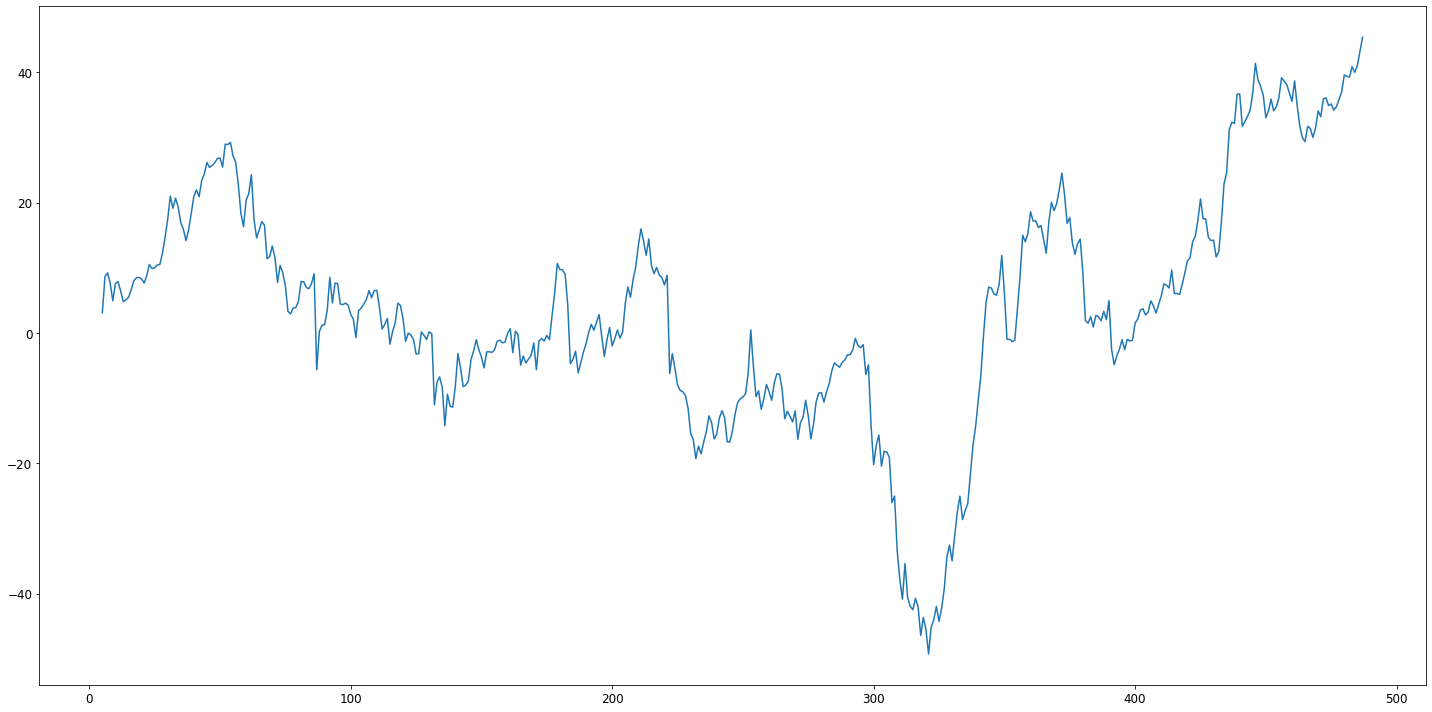

In [100]:
df1['Net Cummulative Returns'] = (((df1['Open Price'] - df1['Close Price'])/(df1['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(df1['Net Cummulative Returns'])

save_fig("Cummulative Returns")

Saving figure confusion-matrix


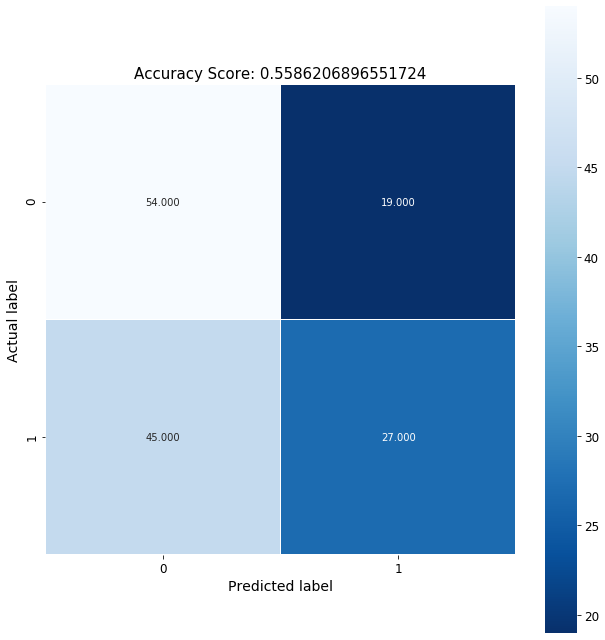

In [104]:
cm=confusion_matrix(y_test,ypred3)
score=accuracy_score(y_test,ypred3)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
save_fig("confusion-matrix")